In [1]:
%matplotlib inline
import xarray as xr
import geopandas as gpd
import pandas as pd

In [2]:
gdf = gpd.read_file(r'C:\Users\rmcd\Documents\Data_v1_1\GFv1.1_simple.shp')
gdf1 = gdf.to_crs(epsg=4326)


In [3]:
gdf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

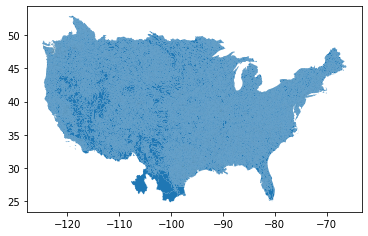

In [4]:
gdf1.plot()

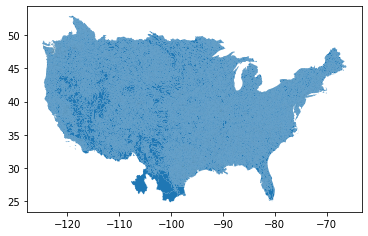

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
gdf1.plot(ax=ax, legend=True);


In [6]:
gdf

,LAYER,GM_TYPE,OBJECTID,nhru_v1_1,hru_segme1,nhm_id,hru_id_nat,Version,Shape_Leng,Shape_Area,Change,geometry
0,NHM\nhru_v1_1_simp,Unknown Area Type,1,76127,40038,76128,76128,1.0,80441.423,188118773,-0.017302,"POLYGON ((-105544.567 804074.976, -105415.315 ..."
1,NHM\nhru_v1_1_simp,Unknown Area Type,2,76147,40038,76148,76148,1.0,53413.506,44185975,0.054540,"POLYGON ((-97185.217 806355.005, -97154.773 80..."
2,NHM\nhru_v1_1_simp,Unknown Area Type,3,76170,40021,76171,76171,1.0,54988.828,73389194,0.018316,"POLYGON ((-105894.643 815045.861, -105703.017 ..."
3,NHM\nhru_v1_1_simp,Unknown Area Type,3,76170,40021,76171,76171,1.0,54988.828,73389194,0.018316,"POLYGON ((-101865.303 821054.983, -101864.906 ..."
4,NHM\nhru_v1_1_simp,Unknown Area Type,3,76170,40021,76171,76171,1.0,54988.828,73389194,0.018316,"POLYGON ((-101865.303 821054.983, -101864.966 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
139796,NHM\nhru_v1_1_simp,Unknown Area Type,114954,57964,31028,57965,57965,1.0,117117.940,255080364,0.002392,"POLYGON ((-305985.253 2729805.067, -305865.062..."
139797,NHM\nhru_v1_1_simp,Unknown Area Type,114955,64080,28886,64081,64081,1.0,67362.398,110274075,0.002877,"POLYGON ((-1284135.000 2658485.000, -1284035.0..."
139798,NHM\nhru_v1_1_simp,Unknown Area Type,114956,64150,28866,64151,64151,1.0,80355.339,188483780,0.022769,"POLYGON ((-1347645.097 2651834.819, -1347614.8..."
139799,NHM\nhru_v1_1_simp,Unknown Area Type,114957,65633,31412,65634,65634,1.0,71022.681,73867000,-0.005068,"POLYGON ((-1017265.000 2869285.000, -1017185.0..."


In [7]:
gdfa = gdf.dissolve(by='nhru_v1_1',as_index=False)
gdfa.head()

,nhru_v1_1,geometry,LAYER,GM_TYPE,OBJECTID,hru_segme1,nhm_id,hru_id_nat,Version,Shape_Leng,Shape_Area,Change
0,1,"POLYGON ((1867455.023 2234955.214, 1867455.180...",NHM\nhru_v1_1_simp,Unknown Area Type,101644,0,1,1,1.0,28474.9550,10046996,0.290400
1,2,"POLYGON ((1865744.747 2237114.794, 1865565.329...",NHM\nhru_v1_1_simp,Unknown Area Type,101645,1244,2,2,1.0,20666.5910,10983189,-0.059369
2,3,"POLYGON ((1862295.252 2239274.962, 1862294.915...",NHM\nhru_v1_1_simp,Unknown Area Type,101646,1236,3,3,1.0,7356.6680,1979753.6,1.006191
3,4,"POLYGON ((1863045.106 2239185.024, 1863104.894...",NHM\nhru_v1_1_simp,Unknown Area Type,101647,1234,4,4,1.0,2215.2813,179143.14,0.029701
4,5,"MULTIPOLYGON (((1873004.972 2237715.021, 18729...",NHM\nhru_v1_1_simp,Unknown Area Type,101648,1239,5,5,1.0,7069.6349,1814065.5,0.335803


In [8]:
hru_elev = pd.read_csv(r'C:\Users\rmcd\Downloads\NHM-PRMS_CONUS_GF_1_1_v5.1.0.4\NHM-PRMS_CONUS_GF_1_1\input\hru_elev.txt',skiprows=5, names=['hru_elev'])
hru_elev.head()

,hru_elev
0,6.0
1,30.0
2,47.0
3,59.0
4,13.0


In [9]:
gdfa

,nhru_v1_1,geometry,LAYER,GM_TYPE,OBJECTID,hru_segme1,nhm_id,hru_id_nat,Version,Shape_Leng,Shape_Area,Change
0,1,"POLYGON ((1867455.023 2234955.214, 1867455.180...",NHM\nhru_v1_1_simp,Unknown Area Type,101644,0,1,1,1.0,28474.9550,10046996,0.290400
1,2,"POLYGON ((1865744.747 2237114.794, 1865565.329...",NHM\nhru_v1_1_simp,Unknown Area Type,101645,1244,2,2,1.0,20666.5910,10983189,-0.059369
2,3,"POLYGON ((1862295.252 2239274.962, 1862294.915...",NHM\nhru_v1_1_simp,Unknown Area Type,101646,1236,3,3,1.0,7356.6680,1979753.6,1.006191
3,4,"POLYGON ((1863045.106 2239185.024, 1863104.894...",NHM\nhru_v1_1_simp,Unknown Area Type,101647,1234,4,4,1.0,2215.2813,179143.14,0.029701
4,5,"MULTIPOLYGON (((1873004.972 2237715.021, 18729...",NHM\nhru_v1_1_simp,Unknown Area Type,101648,1239,5,5,1.0,7069.6349,1814065.5,0.335803
...,...,...,...,...,...,...,...,...,...,...,...,...
114953,114954,"POLYGON ((-1944885.000 3177795.000, -1944905.0...",NHM\nhru_v1_1_simp,Unknown Area Type,84544,0,122114,0,1.1,181854.7900,233192054,-0.016527
114954,114955,"POLYGON ((2135385.000 2699714.735, 2135415.000...",NHM\nhru_v1_1_simp,Unknown Area Type,109624,0,122115,0,1.1,66748.0220,130548637,-0.027039
114955,114956,"POLYGON ((2062701.753 2646525.047, 2062939.750...",NHM\nhru_v1_1_simp,Unknown Area Type,109623,440,122116,0,1.1,63413.6510,78229670,-0.121601
114956,114957,"MULTIPOLYGON (((-580455.225 2871974.899, -5803...",NHM\nhru_v1_1_simp,Unknown Area Type,85864,32500,122117,0,1.1,165156.7800,422370826,-0.006930


In [10]:
gdfa['hru_elev']= hru_elev['hru_elev']
hru_elev['hru_elev']

0           6.0
1          30.0
2          47.0
3          59.0
4          13.0
          ...  
114953     22.0
114954     21.0
114955     41.0
114956    649.0
114957    230.0
Name: hru_elev, Length: 114958, dtype: float64

In [11]:
gdfa

,nhru_v1_1,geometry,LAYER,GM_TYPE,OBJECTID,hru_segme1,nhm_id,hru_id_nat,Version,Shape_Leng,Shape_Area,Change,hru_elev
0,1,"POLYGON ((1867455.023 2234955.214, 1867455.180...",NHM\nhru_v1_1_simp,Unknown Area Type,101644,0,1,1,1.0,28474.9550,10046996,0.290400,6.0
1,2,"POLYGON ((1865744.747 2237114.794, 1865565.329...",NHM\nhru_v1_1_simp,Unknown Area Type,101645,1244,2,2,1.0,20666.5910,10983189,-0.059369,30.0
2,3,"POLYGON ((1862295.252 2239274.962, 1862294.915...",NHM\nhru_v1_1_simp,Unknown Area Type,101646,1236,3,3,1.0,7356.6680,1979753.6,1.006191,47.0
3,4,"POLYGON ((1863045.106 2239185.024, 1863104.894...",NHM\nhru_v1_1_simp,Unknown Area Type,101647,1234,4,4,1.0,2215.2813,179143.14,0.029701,59.0
4,5,"MULTIPOLYGON (((1873004.972 2237715.021, 18729...",NHM\nhru_v1_1_simp,Unknown Area Type,101648,1239,5,5,1.0,7069.6349,1814065.5,0.335803,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114953,114954,"POLYGON ((-1944885.000 3177795.000, -1944905.0...",NHM\nhru_v1_1_simp,Unknown Area Type,84544,0,122114,0,1.1,181854.7900,233192054,-0.016527,22.0
114954,114955,"POLYGON ((2135385.000 2699714.735, 2135415.000...",NHM\nhru_v1_1_simp,Unknown Area Type,109624,0,122115,0,1.1,66748.0220,130548637,-0.027039,21.0
114955,114956,"POLYGON ((2062701.753 2646525.047, 2062939.750...",NHM\nhru_v1_1_simp,Unknown Area Type,109623,440,122116,0,1.1,63413.6510,78229670,-0.121601,41.0
114956,114957,"MULTIPOLYGON (((-580455.225 2871974.899, -5803...",NHM\nhru_v1_1_simp,Unknown Area Type,85864,32500,122117,0,1.1,165156.7800,422370826,-0.006930,649.0


<AxesSubplot:>

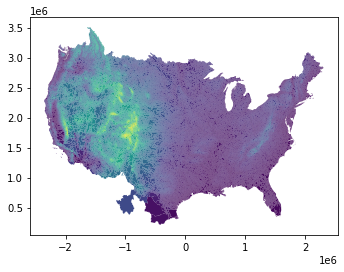

In [12]:
gdfa.plot(column='hru_elev')
# gdfa.plot()

In [13]:
gdfa.to_file("package.gpkg", layer='hru_elev', driver="GPKG")

In [14]:
def std_pres(elev):
    return 101.3 * (((293.0-0.0065*elev)/293.0)**5.26)



In [20]:
std_pres((1000.))

90.02461995703662

In [16]:
nf = gpd.read_file('package.gpkg',layer='hru_elev')

C:\Users\rmcd\Miniconda3\envs\grd2shp-dev\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [17]:
nf

,nhru_v1_1,LAYER,GM_TYPE,OBJECTID,hru_segme1,nhm_id,hru_id_nat,Version,Shape_Leng,Shape_Area,Change,hru_elev,geometry
0,1,NHM\nhru_v1_1_simp,Unknown Area Type,101644,0,1,1,1.0,28474.9550,10046996,0.290400,6.0,"POLYGON ((1867455.023 2234955.214, 1867455.180..."
1,2,NHM\nhru_v1_1_simp,Unknown Area Type,101645,1244,2,2,1.0,20666.5910,10983189,-0.059369,30.0,"POLYGON ((1865744.747 2237114.794, 1865565.329..."
2,3,NHM\nhru_v1_1_simp,Unknown Area Type,101646,1236,3,3,1.0,7356.6680,1979753.6,1.006191,47.0,"POLYGON ((1862295.252 2239274.962, 1862294.915..."
3,4,NHM\nhru_v1_1_simp,Unknown Area Type,101647,1234,4,4,1.0,2215.2813,179143.14,0.029701,59.0,"POLYGON ((1863045.106 2239185.024, 1863104.894..."
4,5,NHM\nhru_v1_1_simp,Unknown Area Type,101648,1239,5,5,1.0,7069.6349,1814065.5,0.335803,13.0,"MULTIPOLYGON (((1873004.972 2237715.021, 18729..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114953,114954,NHM\nhru_v1_1_simp,Unknown Area Type,84544,0,122114,0,1.1,181854.7900,233192054,-0.016527,22.0,"POLYGON ((-1944885.000 3177795.000, -1944905.0..."
114954,114955,NHM\nhru_v1_1_simp,Unknown Area Type,109624,0,122115,0,1.1,66748.0220,130548637,-0.027039,21.0,"POLYGON ((2135385.000 2699714.735, 2135415.000..."
114955,114956,NHM\nhru_v1_1_simp,Unknown Area Type,109623,440,122116,0,1.1,63413.6510,78229670,-0.121601,41.0,"POLYGON ((2062701.753 2646525.047, 2062939.750..."
114956,114957,NHM\nhru_v1_1_simp,Unknown Area Type,85864,32500,122117,0,1.1,165156.7800,422370826,-0.006930,649.0,"MULTIPOLYGON (((-580455.225 2871974.899, -5803..."


In [18]:
nf['hru_elev'][0]

6.0

In [19]:
nf = gpd.read_file('package.gpkg')

C:\Users\rmcd\Miniconda3\envs\grd2shp-dev\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [23]:
import metpy.calc as mpcalc
from metpy.units import units


In [25]:
ht = units.Quantity(1000.0, "m")
stdp = mpcalc.height_to_pressure_std(ht) 

In [ ]:
relh = mpcalc.re

In [28]:
(279.59796 * units.kelvin).to(units.degC)

6.447960000000023 <Unit('degree_Celsius')>

In [100]:
import numpy as np
conv = (1 * units.kelvin).to(units.degC)
type(conv)
print(conv.magnitude)
type(conv.units.format_babel())
conv.units.format_babel()

-272.15


'degree_Celsius'

In [29]:
units('mm')

1 <Unit('millimeter')>

In [30]:
units.mm

<Unit('millimeter')>

In [33]:
type(units.inch)


pint.unit.build_unit_class.<locals>.Unit

In [32]:
(1*units.mm).to(units.inch)

0.03937007874015749 <Unit('inch')>

In [51]:
units.inch.format_babel()

'inch'

In [52]:
ds1 = xr.open_dataset('C:/Users/rmcd/.gridmet/cfsv2_metdata_forecast_tmmx_daily_median.nc')

In [53]:
ds1['air_temperature'].units

'K'

In [54]:
ds1['air_temperature'].long_name

'tmmx'

In [55]:
ds1['air_temperature'].description

'Daily Maximum Temperature'

In [56]:
ds1.crs

<xarray.DataArray 'crs' (crs: 1)>
array([3.], dtype=float32)
Coordinates:
  * crs      (crs) float32 3.0
Attributes:
    grid_mapping_name:            latitude_longitude
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    long_name:                    WGS 84
    inverse_flattening:           298.257223563
    GeoTransform:                 -124.7666666333333 0.041666666666666 0  49....
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    _ChunkSizes:                  1

In [91]:
import netCDF4
ncfile = netCDF4.Dataset(
                'test.nc',
                mode='w', format='NETCDF4_CLASSIC'
            )
crs = ncfile.createVariable('crs',  np.dtype(np.int))


In [92]:
crs.GeoTransform = ds1.crs.GeoTransform
crs.grid_mapping_name = ds1.crs.grid_mapping_name
crs.inverse_flattening = ds1.crs.inverse_flattening
crs.long_name = ds1.crs.long_name
crs.longitude_of_prime_meridian = ds1.crs.longitude_of_prime_meridian
crs.semi_major_axis = ds1.crs.semi_major_axis
crs.spatial_ref = ds1.crs.spatial_ref
# crs.NAME = ds1.crs.NAME

In [93]:
ncfile.close()

In [101]:
units.inch

<Unit('inch')>

In [102]:
units.inch.format_babel()

'inch'